<a href="https://colab.research.google.com/github/Rmianm/Modelos_clasificacion-ML/blob/master/%C3%81rbol%20Pacientes/Pacientes_%C3%81rbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Machine L./Datasets/Pacientes_Enfermos.csv',index_col=0)
datos.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [ ]:
datos.info()
#Nos damos cuenta que el target está en variable categórica, vamos a pasarla como 0 y 1 con un mapeado.

In [ ]:
datos['Enfermedad'] = datos['Enfermedad'].map({'SI': 1, 'NO': 0})

In [ ]:
#Variable predictora
X = datos.iloc[:,1:11]
#Variable a predecir
Y = datos.iloc[:,0]

In [ ]:
Y.head()


NOEXPED
1    0
2    1
3    1
4    0
5    0
Name: Enfermedad, dtype: int64

In [ ]:
#Divisón de los datos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.75,random_state=42)
# 42 se ha vuelto popular poque da "respuesta a la pregunta de la vida, el universo y todo lo demás", según una supercomputadora extraterrestre llamada "Deep Thought"
#En la novela The Hitchhiker's Guide to the Galaxy" del autor Douglas Adams

In [ ]:
Y_test

NOEXPED
921    0
742    1
97     0
727    0
393    0
      ..
903    0
319    0
812    0
937    0
602    0
Name: Enfermedad, Length: 247, dtype: int64

In [ ]:
#Creamos el modelo
#Llamamos al constructor del árbol de decision
arbol = DecisionTreeClassifier(max_depth=4)

In [ ]:
#Entrenamos el modelo
arbol_enfermedad = arbol.fit(X_train,Y_train)

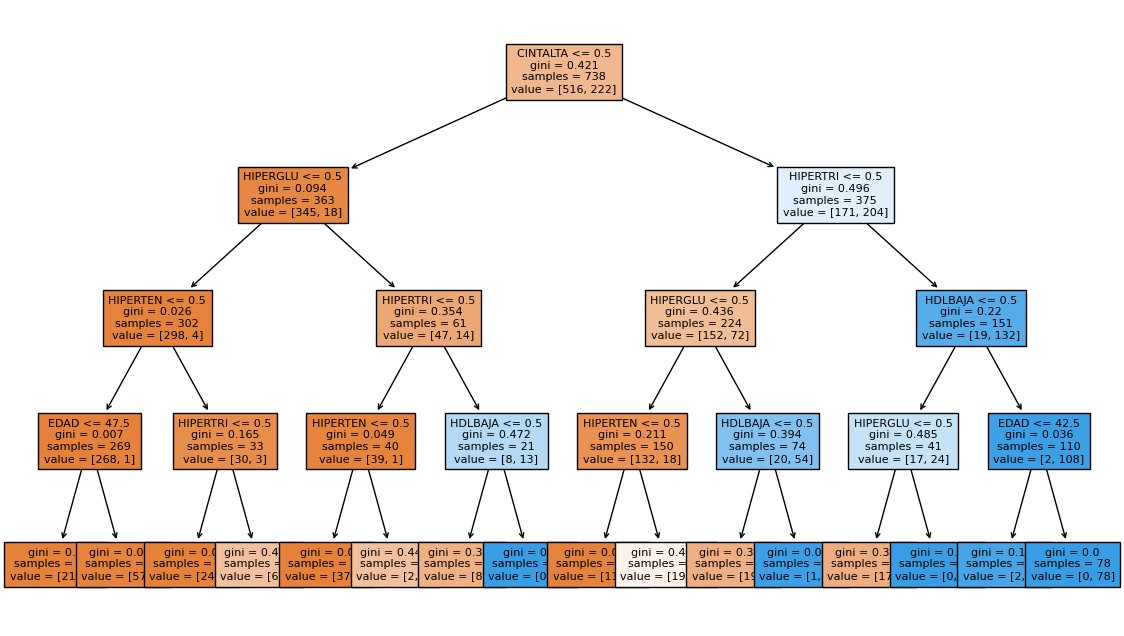

In [ ]:
plt.figure(figsize=(14, 8))
plot_tree(decision_tree = arbol_enfermedad, feature_names = X_test.columns, filled = True, fontsize=8)
plt.savefig('Aárbol Decisión.png')

In [ ]:
#LLevamos a cabo la predicción
y_pred = arbol_enfermedad.predict(X_test)
y_pred

In [ ]:
matriz_de_confusion = confusion_matrix(Y_test,y_pred)
matriz_de_confusion

array([[171,   2],
       [ 22,  52]])

In [ ]:
matriz_de_confusion = confusion_matrix(Y_test,y_pred,labels=[1,0])
matriz_de_confusion

array([[ 52,  22],
       [  2, 171]])

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

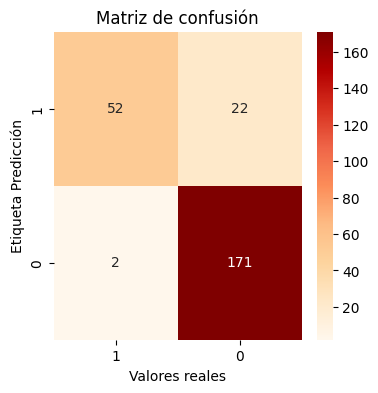

In [ ]:
#Notemos que tenemos 0 para No enfermos y 1 para Enfermos, o bien sea Si(Verdadero) = 1 y No(Negativos) = 0
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap((matriz_de_confusion),annot=True,cmap='OrRd',fmt='g')
plt.xlabel('Valores reales')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta Predicción') 
#annot permite colocar los valores en cada celda
#cmap es el estilo del heatmap
#fmt formáto numérico ".2f" para dar 2 decimales "d" formato numero entero "g" formato general mostrará enteros pero puede hacerlo en notación científica si amerita

In [ ]:
#Precisión global del modelo
precision_global = np.sum(matriz_de_confusion.diagonal())/np.sum(matriz_de_confusion)
precision_global

0.902834008097166

In [ ]:
#Otra manera de ver la precisión global del modelo
accuracy = accuracy_score(Y_test,y_pred)
print(f'accuracy: {accuracy}')

accuracy: 0.902834008097166
